In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
plt.rcParams["figure.figsize"]=12,12

C:\Users\bendi\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
#Read data 
Cars = pd.read_csv('./CarPrice_Assignment.csv')

#Separate car name and model
CompanyName = Cars["CarName"].apply(lambda x: x.split(" ")[0])
#CarModel = Cars["CarName"].apply(lambda x: x.split(" ")[1])
#CarModel = Cars["CarName"].apply(lambda x: x.split(" ")[1])
#Insert into dataframe
Cars.insert(3, "CompanyName", CompanyName)
#Cars.insert(4, "CarModel", CarModel)
Cars.drop(["CarName"], axis=1, inplace = True)
Cars.drop(['car_ID'],axis=1,inplace=True)

Cars.head()

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [252]:
#Check for spelling errors in CompanyName
Cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [3]:
#Correct the spelling errors
Cars = Cars.replace(to_replace = "maxda", value = "mazda")
Cars = Cars.replace(to_replace = "Nissan", value = "nissan")
Cars = Cars.replace(to_replace = "porcshce", value = "porsche")
Cars = Cars.replace(to_replace = "toyouta", value = "toyota")
Cars = Cars.replace(to_replace = "vokswagen", value = "volkswagen")
Cars = Cars.replace(to_replace = "vw", value = "volkswagen")

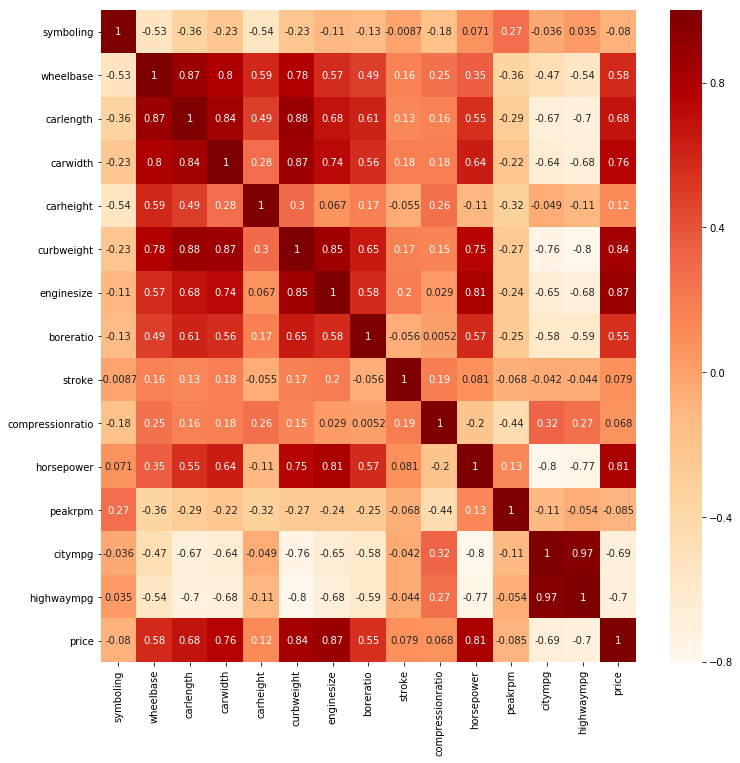

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [254]:
#Look at correlation
sns.heatmap(Cars.corr(),cmap="OrRd",annot=True)
plt.show()
Cars.head()

In [4]:
#Keep only variables with high correlation to price
Cars = Cars.drop(["peakrpm", "compressionratio", "stroke", "carheight", "symboling"],axis=1)

In [256]:
#Convert string variables into dummy variables
#Cars = pd.get_dummies(Cars)

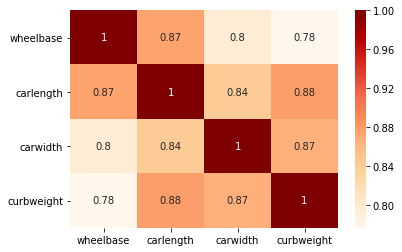

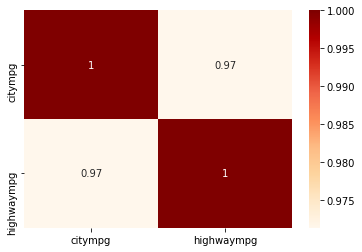

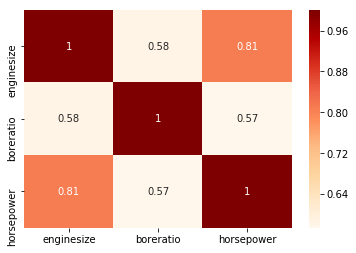

In [5]:
#Look at correlation between some other variables
vars1 = ['wheelbase', 'carlength', 'carwidth','curbweight']
vars2 = ['citympg','highwaympg']
vars3 = ['enginesize','boreratio','horsepower']
sns.heatmap(Cars.filter(vars1).corr(),cmap="OrRd",annot=True)
plt.show()
sns.heatmap(Cars.filter(vars2).corr(),cmap="OrRd",annot=True)
plt.show()
sns.heatmap(Cars.filter(vars3).corr(),cmap="OrRd",annot=True)
plt.show()

Wheel base, car length, car width and curb weight are all correlated, so I'll just keep one of them.
City mpg and highway mpg are also highly correlated, so I'll keep only 1
Engine size and horsepower is also correlated, so I'll keep one of them.

In [6]:
#Removing those of the correlated that are least correlated with price
Cars.drop(["citympg"], axis=1, inplace = True)
Cars.drop(['wheelbase'],axis=1,inplace=True)
Cars.drop(['carlength'],axis=1,inplace=True)
Cars.drop(['carwidth'],axis=1,inplace=True)
Cars.drop(['horsepower'],axis=1,inplace=True)

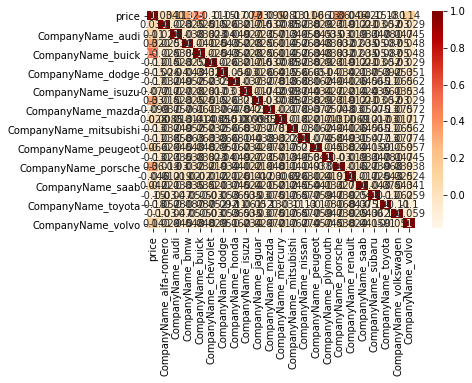

In [8]:
Cars = pd.get_dummies(Cars)
pd.get_dummies(Cars).columns
vars = ["price", 'CompanyName_alfa-romero', 'CompanyName_audi', 'CompanyName_bmw',
       'CompanyName_buick', 'CompanyName_chevrolet', 'CompanyName_dodge',
       'CompanyName_honda', 'CompanyName_isuzu', 'CompanyName_jaguar',
       'CompanyName_mazda', 'CompanyName_mercury', 'CompanyName_mitsubishi',
       'CompanyName_nissan', 'CompanyName_peugeot', 'CompanyName_plymouth',
       'CompanyName_porsche', 'CompanyName_renault', 'CompanyName_saab',
       'CompanyName_subaru', 'CompanyName_toyota', 'CompanyName_volkswagen',
       'CompanyName_volvo',]

sns.heatmap(Cars.filter(vars).corr(),cmap="OrRd",annot=True)
plt.show()
#Keeping buick


In [9]:
remove = ['CompanyName_alfa-romero', 'CompanyName_audi', 'CompanyName_bmw','CompanyName_chevrolet', 'CompanyName_dodge',
       'CompanyName_honda', 'CompanyName_isuzu', 'CompanyName_jaguar',
       'CompanyName_mazda', 'CompanyName_mercury', 'CompanyName_mitsubishi',
       'CompanyName_nissan', 'CompanyName_peugeot', 'CompanyName_plymouth',
       'CompanyName_porsche', 'CompanyName_renault', 'CompanyName_saab',
       'CompanyName_subaru', 'CompanyName_toyota', 'CompanyName_volkswagen',
       'CompanyName_volvo',]



#Keeping porsche, jaguar, buick, bmw, alfa-romeo, cause those have more than 0.3 correlation to price
Cars.drop(remove, axis = 1, inplace = True)

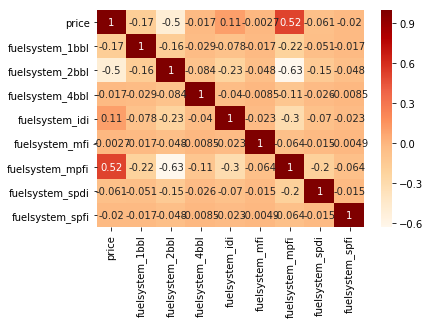

In [10]:
#Looking at more correlations to price
Cars.columns
vars = ["price", 'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi']
sns.heatmap(Cars.filter(vars).corr(),cmap="OrRd",annot=True)
plt.show()

In [11]:
#remove all with low correlations to price
remove = ['fuelsystem_1bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_spdi', 'fuelsystem_spfi']
Cars.drop(remove, axis = 1, inplace = True)

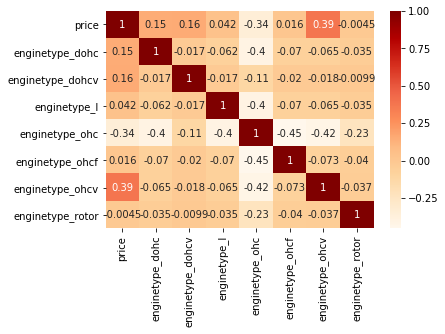

In [12]:
vars = ['price','enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor']

sns.heatmap(Cars.filter(vars).corr(),cmap="OrRd",annot=True)
plt.show()
#Remove all

In [13]:
#remove all with low correlations to price
remove = ['enginetype_dohc', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor']
Cars.drop(remove, axis = 1, inplace = True)

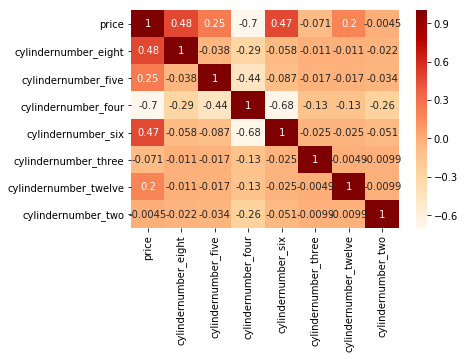

In [14]:
vars = ['price','cylindernumber_eight', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two']

sns.heatmap(Cars.filter(vars).corr(),cmap="OrRd",annot=True)
plt.show()
#Remove three, twelve, two and five

In [15]:
#remove all cylinders
remove = ['cylindernumber_eight', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two']
Cars.drop(remove, axis = 1, inplace = True)

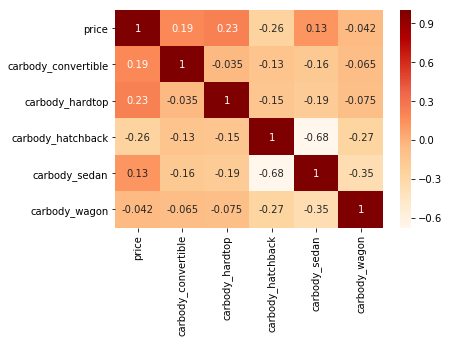

In [16]:
vars = ["price", 'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon']
sns.heatmap(Cars.filter(vars).corr(),cmap="OrRd",annot=True)
plt.show()

In [17]:
remove = ['carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon']
Cars.drop(remove, axis = 1, inplace = True)

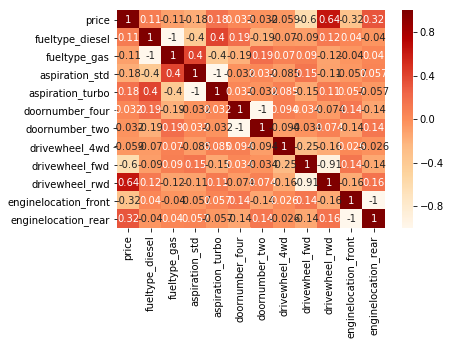

In [18]:
#Look at last variables
vars = ['price', 'fueltype_diesel', 'fueltype_gas',
       'aspiration_std', 'aspiration_turbo', 'doornumber_four',
       'doornumber_two', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_front', 'enginelocation_rear',]
sns.heatmap(Cars.filter(vars).corr(),cmap="OrRd",annot=True)
plt.show()
#Keeping only 'drivewheel_fwd', 'drivewheel_rwd'

In [19]:
remove = ['fueltype_diesel', 'fueltype_gas',
       'aspiration_std', 'aspiration_turbo', 'doornumber_four',
       'doornumber_two', 'drivewheel_4wd','enginelocation_front', 'enginelocation_rear',]
Cars.drop(remove, axis = 1, inplace = True)

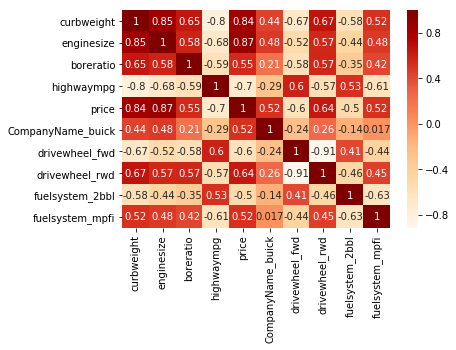

In [20]:
sns.heatmap(Cars.corr(),cmap="OrRd",annot=True)
plt.show()

Now we finally only have variables highly correlated with price. Now we will test different machine learning models and do a bias variance trade-off.

In [339]:
#X = Cars.loc[:,Cars.columns != "price"]
#y = Cars["price"]
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.8)
Cars_train, Cars_test = train_test_split(Cars, test_size = 0.3)

In [21]:
def mse(a,b):
    return np.mean((a-b)**2)

In [307]:
regr = RandomForestRegressor(max_depth=10, random_state=0)
regr.fit(X, y);
y_pred = regr.predict(X_test)
mse(y_test,y_pred)

1209801.2932547806

In [342]:
#Scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#scaler.fit(X_train)
#X_train = scaler.fit_transform(X_train["curbweigth"])
#X_test = scaler.transform(X_test)
col_to_scale = ['curbweight','enginesize','boreratio','highwaympg','price']

Cars_train[col_to_scale] = scaler.fit_transform(Cars_train.loc[:,col_to_scale])
Cars_test[col_to_scale] = scaler.fit_transform(Cars_test.loc[:,col_to_scale])
Cars.head()

C:\Users\bendi\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\bendi\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\bendi\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://panda

,curbweight,enginesize,boreratio,highwaympg,price,CompanyName_buick,drivewheel_fwd,drivewheel_rwd,fuelsystem_2bbl,fuelsystem_mpfi
0,2548,130,3.47,27,13495.0,0,0,1,0,1
1,2548,130,3.47,27,16500.0,0,0,1,0,1
2,2823,152,2.68,26,16500.0,0,0,1,0,1
3,2337,109,3.19,30,13950.0,0,1,0,0,1
4,2824,136,3.19,22,17450.0,0,0,0,0,1


In [344]:
Cars_train.head()

,curbweight,enginesize,boreratio,highwaympg,price,CompanyName_buick,drivewheel_fwd,drivewheel_rwd,fuelsystem_2bbl,fuelsystem_mpfi
195,0.910947,0.341872,1.612555,-0.379080,0.016380,0,0,1,0,1
8,1.010746,0.091166,-0.705524,-1.621681,1.323326,0,1,0,0,1
128,0.461848,1.670614,1.469904,-0.845055,2.966755,0,0,1,0,1
94,-1.167572,-0.761235,-0.634198,1.018846,-0.747796,0,1,0,1,0
179,0.876401,1.093990,-0.206245,-1.000380,0.339118,0,0,1,0,1


In [378]:
X_train = Cars_train.loc[:, Cars_train.columns != 'price']
y_train = Cars_train.loc[:,Cars_train.columns == 'price']
X_test = Cars_test.loc[:, Cars_test.columns != 'price']
y_test = Cars_test.loc[:,Cars_test.columns == 'price']
y_test.head()

,price
55,-0.293416
191,0.004421
13,0.994252
59,-0.559568
165,-0.502155


In [465]:
regr = RandomForestRegressor(max_depth=20)
regr.fit(X_train, y_train);
y_pred = regr.predict(X_test)
e = mse(y_test,y_pred.reshape(len(y_pred),1))

nbootstraps = 100
errors = np.zeros(nbootstraps)

for i in range(nbootstraps):
    regr = RandomForestRegressor(max_depth=1)
    regr.fit(X_train, y_train)
    errors[i] = mse(y_test,y_pred.reshape(len(y_pred),1))
print(regr.get_params)
np.mean(errors)

C:\Users\bendi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\bendi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\bendi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\bendi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example u

C:\Users\bendi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\bendi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\bendi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\bendi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

C:\Users\bendi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\bendi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\bendi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\bendi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=1,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)>


C:\Users\bendi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\bendi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\bendi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\bendi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

0.06570445588913222

In [461]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
e = mse(y_test, y_pred.reshape(len(y_pred),1))
e

price    0.1726
dtype: float64

In [32]:
nonlin = ['curbweight', 'enginesize', 'boreratio', 'highwaympg']

#1st order 
Cars1 = Cars
#2nd order
Cars2 = Cars
#for feat in nonlin:
#    Cars2.insert(4, feat + "2", Cars[feat]**2)
Cars3 = Cars2

,curbweight,enginesize,boreratio,highwaympg,highwaympg2,boreratio2,enginesize2,curbweight2,price,CompanyName_buick,drivewheel_fwd,drivewheel_rwd,fuelsystem_2bbl,fuelsystem_mpfi
0,2548,130,3.47,27,729,12.0409,16900,6492304,13495.0,0,0,1,0,1
1,2548,130,3.47,27,729,12.0409,16900,6492304,16500.0,0,0,1,0,1
2,2823,152,2.68,26,676,7.1824,23104,7969329,16500.0,0,0,1,0,1
3,2337,109,3.19,30,900,10.1761,11881,5461569,13950.0,0,1,0,0,1
4,2824,136,3.19,22,484,10.1761,18496,7974976,17450.0,0,0,0,0,1


In [34]:
Cars.head()

,curbweight,enginesize,boreratio,highwaympg,highwaympg2,boreratio2,enginesize2,curbweight2,price,CompanyName_buick,drivewheel_fwd,drivewheel_rwd,fuelsystem_2bbl,fuelsystem_mpfi
0,2548,130,3.47,27,729,12.0409,16900,6492304,13495.0,0,0,1,0,1
1,2548,130,3.47,27,729,12.0409,16900,6492304,16500.0,0,0,1,0,1
2,2823,152,2.68,26,676,7.1824,23104,7969329,16500.0,0,0,1,0,1
3,2337,109,3.19,30,900,10.1761,11881,5461569,13950.0,0,1,0,0,1
4,2824,136,3.19,22,484,10.1761,18496,7974976,17450.0,0,0,0,0,1
